In [1]:
import numpy as np
from numpy import fft as fft
from matplotlib import pyplot as plt
import astropy.io.fits as pyfits

In [22]:
def check_kbins(kbins):
    for i, k in enumerate(kbins):
        for j, l in enumerate(kbins[:i]):
            if k < l:
                return (i, j)
    return None

def build_theta_avg(R, n, m):
    b = np.log10(R)/m
    print(f"{b=}")
    c = 10**b
    print(f"{c=}")
    theta_mid = 10**(b*np.arange(n+10+1))
    print("theta_mid", theta_mid)
    thetaa = []
    thetaa.append(5.0)
    thetaa.append(thetaa[0]*1.8)
    thetaa.append(thetaa[1]*1.5)
    
    theta = thetaa[-1]
    while theta <= R/(2.2*2.2*2.2):
        theta *= c
        thetaa.append(theta)

    thetaa.append(thetaa[-1]*2.2)
    thetaa.append(thetaa[-1]*2.2)
    thetaa.append(thetaa[-1]*2.3)
    

    print("theta", thetaa)
    return np.array(thetaa)

def build_kbins(thetaa):
    thetaa = np.flip(thetaa)
    kbins = np.zeros(thetaa.size+1)
    kbins[0] = 0.0
    for i in range(0, thetaa.size):
        kbins[i+1] = 2.0/thetaa[i] - kbins[i]
    return kbins

x = 1000
R = np.hypot(x/2.0, x/2.0)

theta_avg = build_theta_avg(R, 24, 24)
kbins = build_kbins(theta_avg)
print(check_kbins(kbins))
print(kbins*x)

b=0.11872854175700039
c=1.3144030002813458
theta_mid [1.00000000e+00 1.31440300e+00 1.72765525e+00 2.27083524e+00
 2.98479265e+00 3.92322042e+00 5.15669269e+00 6.77797234e+00
 8.90898718e+00 1.17099995e+01 1.53916585e+01 2.02308420e+01
 2.65914795e+01 3.49519204e+01 4.59409091e+01 6.03848687e+01
 7.93700526e+01 1.04324235e+02 1.37124088e+02 1.80236312e+02
 2.36903150e+02 3.11386211e+02 4.09286970e+02 5.37968021e+02
 7.07106781e+02 9.29423275e+02 1.22163674e+03 1.60572300e+03
 2.11056713e+03 2.77413576e+03 3.64633237e+03 4.79275021e+03
 6.29960525e+03 8.28022004e+03 1.08835461e+04]
theta [5.0, 9.0, 13.5, 17.74444050379817, 23.32334583650615, 30.65627574410312, 40.294700815501386, 52.963475647334214, 69.61535129618409, 153.153772851605, 336.938300273531, 774.9580906291212]
(5, 4)
[  0.           2.58078472   3.35502014   9.70375055  19.02554497
  18.73632726  30.89799089  34.3415058   51.40948439  61.30187439
  86.84627375 135.37594847 264.62405153]


In [58]:
def build_kbins(R, n, m):
    b = np.log10(R)/m
    print(f"{b=}")
    c = 10**b
    print(f"{c=}")

    kbins = [0, 2.0/R]
    kbins.append(kbins[-1]*c*c)
    
    for i in range(n-2):
        kbins.append(kbins[-1]*c)
    return np.array(kbins)

def build_theta_vals(kbins):
    kvals = 0.5*(kbins[1:]+kbins[:-1])
    theta_vals = 1.0/kvals
    theta_vals = np.flip(theta_vals)
    return theta_vals

x = 1000
R = np.hypot(x/2.0, x/2.0)
print("R", R)
kbins = build_kbins(400, 24, 26)
print("kbins", kbins*1001)

theta_vals = build_theta_vals(kbins)
print("theta_vals", theta_vals)

R 707.1067811865476
b=0.10007923043569086
c=1.2591551045765728
kbins [   0.            5.005         7.93528524    9.99175492   12.58116921
   15.84164344   19.9470862    25.11647541   31.62553822   39.82145788
   50.14139197   63.13578965   79.49775181  100.1         126.04142597
  158.7057049   199.83509845  251.62338428  316.83286875  398.94172398
  502.32950818  632.5107644   796.4291577  1002.82783935 1262.71579293]
theta_vals [  0.88367312   1.11268151   1.40103861   1.76412492   2.22130689
   2.79696991   3.52181894   4.4345163    5.58374383   7.03079955
   8.85286714  11.14713286  14.03596924  17.67346231  22.25363028
  28.02077217  35.28249831  44.42613785  55.93939825  70.43637885
  88.69032598 111.67487669 154.71065453 400.        ]


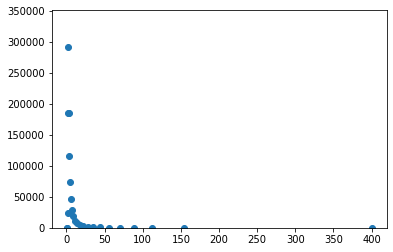

nr [    81    112    112    192    296    452    748   1156   1824   2920
   4648   7320  11612  18436  29228  46296  73472 116448 184632 292186
 184620  23209      0      0]
400.00 : 81
154.71 : 112
111.67 : 112
88.69 : 192
70.44 : 296
55.94 : 452
44.43 : 748
35.28 : 1156
28.02 : 1824
22.25 : 2920
17.67 : 4648
14.04 : 7320
11.15 : 11612
8.85 : 18436
7.03 : 29228
5.58 : 46296
4.43 : 73472
3.52 : 116448
2.80 : 184632
2.22 : 292186
1.76 : 184620
1.40 : 23209
1.11 : 0
0.88 : 0


In [59]:
kfreq = fft.fftfreq(x)*x
kfreq = fft.fftshift(kfreq)
kfreq2D = np.meshgrid(kfreq, kfreq)

# take the norm of the wave vectors
kfreq_norm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

kbins_s = kbins*1001

nr = np.histogram(kfreq_norm.flatten(),kbins_s)[0]
rbin_center = 0.5*(kbins[1:]+kbins[:-1])
theta_center = 1.0/rbin_center
plt.plot(theta_center, nr, 'o')
plt.ylim(0, np.max(nr)*1.2)
plt.show()

print("nr", nr)

for t, n in zip(theta_center, nr):
    print(f"{t:0.2f} : {n}")
